# A worker for the Dept of Fish and Game is assigned the job of estimating the number of trout in a certain lake of modest size

# She proceeds as follows: she catches 100 trout, tags each of them, and puts them back in the lake

# One month later, she catches 100 more trout, and notes that 10 of them have tags

### a) Without doing any fancy calculations, give a rough estimate of the number of fish in the lake

### b) Let $N$ be the number of trout in the lake. Find an expression, in terms of $N$, for the probability that the worker would catch 10 tagged trout out of 100 that she caught the last time

### c) Find the value of $N$ that maximizes the expression in part b). This value is called the *maximum likelihood estimate* for the unknown quantity $N$

___

# a)

### Assuming that in the 1 month period the tagged fish diffused randomly throughout the lake, the probability of a given fish being tagged is $\frac{100}{\text{Total Number of Fish}}$

### Since she caught 10, this means $10 = 100 \cdot \frac{100}{\text{Total Number of Fish}} \implies \text{Total Number of Fish} = 1000$

___

# b)

# There are 100 tagged fish in the lake, and she catches 10

### There are $\binom{100}{10}$ ways this can happen

# Of the $N-100$ untagged fish in the water, she catches 90

### There are $\binom{N-100}{90}$

# The total number of possible combinations of fish is equal to $\binom{N}{100}$

# Therefore $P(\text{Caught 10 tagged fish}) = \frac{\binom{100}{10}\binom{N-100}{90}}{\binom{N}{100}}$

___

# c)

## We can treat $\binom{100}{10}$ as a constant and hence can ignore it

## Let's plot $f(N) = \frac{\binom{N-100}{90}}{\binom{N}{100}}$ so we can see what it looks like

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

### We need $N\geq 190$, or else the numerator is not logical

In [4]:
def choose(n,k):
    numerator = factorial(n)
    denominator = factorial(k)*factorial(n-k)
    return numerator/denominator

In [5]:
def func(N):
    numerator = choose(N-100, 90)
    denominator = choose(N, 100)
    return float(numerator)/denominator

In [6]:
func = np.vectorize(func)

In [10]:
x = np.arange(190, 2000)
y = func(x)

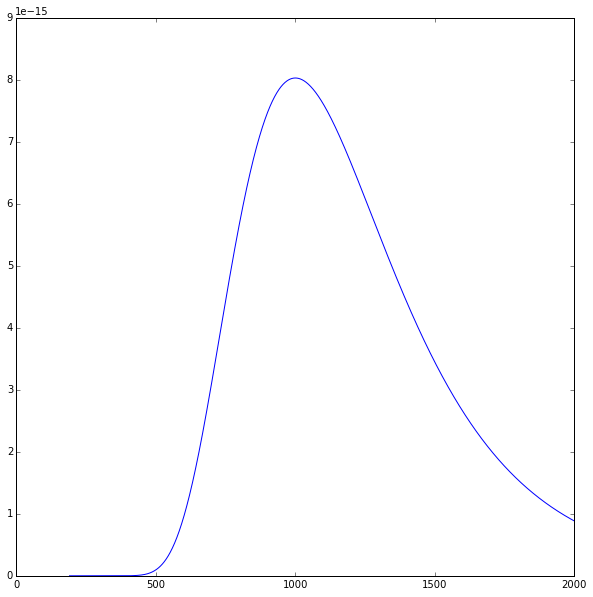

In [11]:
plt.plot(x,y)

# It looks like the plot peaks somewhere between 900 and 1200

## Let's loop through and see where is is

In [16]:
max_val = 0

for N in range(900,1200):
    val = func(N)
    if max_val<val:
        max_val = val
    else:
        print(N-1, max_val)
        break

(999, array(8.029045813813432e-15))


## Looks like the actual peak is right at 999

# Let's derive this value

### The hint in the book says to look at the ratio of successive values

# $\frac{f(N+1)}{f(N)} = \frac{\frac{\binom{N+1-100}{90}}{\binom{N+1}{100}}}{\frac{\binom{N-100}{90}}{\binom{N}{100}}} = \frac{\binom{N+1-100}{90}\binom{N}{100}}{\binom{N+1}{100}\binom{N-100}{90}} = \frac{\binom{N}{100}}{\binom{N+1}{100}}\frac{\binom{N+1-100}{90}}{\binom{N-100}{90}}$

# $\frac{\binom{N}{100}}{\binom{N+1}{100}} = \frac{N!}{100!(N-100)!}\frac{100!(N+1-100)!}{(N+1)!} = \frac{N-99}{N+1}$

# $\frac{\binom{N+1-100}{90}}{\binom{N-100}{90}} = \frac{(N+1-100)!}{90!(N+1-190)!}\frac{90!(N-190)!}{(N-100)!} = \frac{N-99}{N-189}$

# So $\frac{f(N+1)}{f(N)} = \frac{N-99}{N+1}\frac{N-99}{N-189}$

In [30]:
df = pd.DataFrame({'N':range(995, 1005)})
df['f(N)'] = func(df['N'].values)
df['f(N+1)/f(N)'] = df['f(N)'].shift(-1)/df['f(N)']

In [31]:
df

,N,f(N),f(N+1)/f(N)
0,995,8.028048e-15,1.000050
1,996,8.028448e-15,1.000037
2,997,8.028747e-15,1.000025
3,998,8.028946e-15,1.000012
4,999,8.029046e-15,1.000000
5,1000,8.029046e-15,0.999988
6,1001,8.028947e-15,0.999975
7,1002,8.028750e-15,0.999963
8,1003,8.028454e-15,0.999951
9,1004,8.028061e-15,NaN


# As we can see from the table above, the crossover from increasing to decreasing is at $N=999$

## To derive this value for N, we can solve for where $f(N+1)/f(N) = 1$

# $\frac{f(N+1)}{f(N)} = 1 \implies N^{2} - 2(99)N + 99^{2} = N^{2} - 188N - 189$

# $\implies 99^{2} + 189 = 10N \implies 9990 = 10N \implies N = 999$